In [2]:
import pandas as pd

xls = pd.ExcelFile('companies_new.xlsx')
sheets = xls.sheet_names
sheet_to_df_map = {}
for sheet in sheets:
    sheet_to_df_map[sheet] = xls.parse(sheet)
    

df = pd.concat(sheet_to_df_map.values(), ignore_index=True)

In [3]:

excel_file = 'companies_new.xlsx'

price_data = pd.read_excel(excel_file)

print(price_data.head())


      COMP                    Date   Open   High    Low  Close  Volume
0  ALLIANZ 2019-02-22 16:00:00.288  79.96  81.35  79.80  81.23  423912
1  ALLIANZ 2019-02-25 16:00:00.288  81.76  82.67  81.72  82.41  540216
2  ALLIANZ 2019-02-26 16:00:00.288  82.25  83.16  82.16  82.68  327024
3  ALLIANZ 2019-02-27 16:00:00.288  82.43  83.53  82.07  83.27  366054
4  ALLIANZ 2019-02-28 16:00:00.288  82.05  82.06  81.07  81.81  519239


In [4]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [5]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [6]:
df['COMP'].value_counts()

UNILEVER            1135
BMW                 1127
DELIVERY HERO       1127
DEUTSCHEBANK        1127
HENKEL              1127
LUFTHANSA           1127
VOLKSWAGEN          1127
ZALANDO             1127
HELLOFRESH          1117
ALLIANZ             1116
DEUTSCHE TELEKOM    1116
HUGO BOSS           1116
SAP                 1116
SIEMENS              992
BASF                 886
Name: COMP, dtype: int64

In [7]:
news = pd.read_csv('news_data.csv')

In [8]:
news = news[['just_date', 'message', 'COMP']].rename({'just_date': 'Date'}, axis = 'columns')

In [9]:
news['Date'] = news['Date'].astype('datetime64[ns]')

In [10]:
def func(x):
    res = x.upper() 
    if res == 'ZAL':
        return 'ZALANDO'
    else:
        return res

In [11]:
news['COMP'] = news['COMP'].apply(lambda x: func(x))

In [12]:
result = pd.merge(df, news, how="left", on=["COMP", "Date"])

In [13]:
result.message.notna().sum()

3661

In [14]:
result

,COMP,Date,Open,High,Low,Close,Volume,message
0,ALLIANZ,2019-02-22,79.96,81.35,79.80,81.23,423912,NaN
1,ALLIANZ,2019-02-25,81.76,82.67,81.72,82.41,540216,NaN
2,ALLIANZ,2019-02-26,82.25,83.16,82.16,82.68,327024,kurz vor dem gipfeltreffen: alle blicke sind a...
3,ALLIANZ,2019-02-27,82.43,83.53,82.07,83.27,366054,NaN
4,ALLIANZ,2019-02-28,82.05,82.06,81.07,81.81,519239,kommentar: die allianz der erzrivalen daimler ...
...,...,...,...,...,...,...,...,...
17655,ZALANDO,2023-07-24,30.75,31.25,30.28,30.82,1002680,NaN
17656,ZALANDO,2023-07-25,30.75,31.58,30.75,31.35,1146526,NaN
17657,ZALANDO,2023-07-26,31.05,31.85,30.45,30.72,825826,NaN
17658,ZALANDO,2023-07-27,30.45,32.17,30.45,31.35,980111,NaN


In [15]:
result.to_csv('final.csv')

In [16]:
result['COMP'].value_counts()

VOLKSWAGEN          1542
LUFTHANSA           1453
DEUTSCHEBANK        1357
ALLIANZ             1169
BMW                 1147
UNILEVER            1139
HENKEL              1133
ZALANDO             1133
DEUTSCHE TELEKOM    1131
DELIVERY HERO       1129
SAP                 1122
HELLOFRESH          1118
HUGO BOSS           1116
SIEMENS             1071
BASF                 900
Name: COMP, dtype: int64

In [17]:
import numpy as np

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [21]:
merged_data = pd.merge(df, news, on=['Date', 'COMP'], how='left')

merged_data['Date'].fillna(0, inplace=True)

new_data = merged_data.copy()
new_data['has_news'] = np.where(pd.notna(new_data['message']), 1, 0)

grouped_data = new_data.groupby(['Date', 'COMP', 'Open'])['has_news'].sum().reset_index()

# Create a new DataFrame from the grouped data
data = pd.DataFrame(grouped_data)



In [22]:
data

,Date,COMP,Open,has_news
0,2019-02-22,ALLIANZ,79.96,0
1,2019-02-22,BMW,72.97,0
2,2019-02-22,DELIVERY HERO,33.68,0
3,2019-02-22,DEUTSCHE TELEKOM,104.65,0
4,2019-02-22,DEUTSCHEBANK,7.62,0
...,...,...,...,...
16478,2023-07-28,LUFTHANSA,8.91,0
16479,2023-07-28,SAP,135.83,0
16480,2023-07-28,UNILEVER,48.62,0
16481,2023-07-28,VOLKSWAGEN,120.00,0


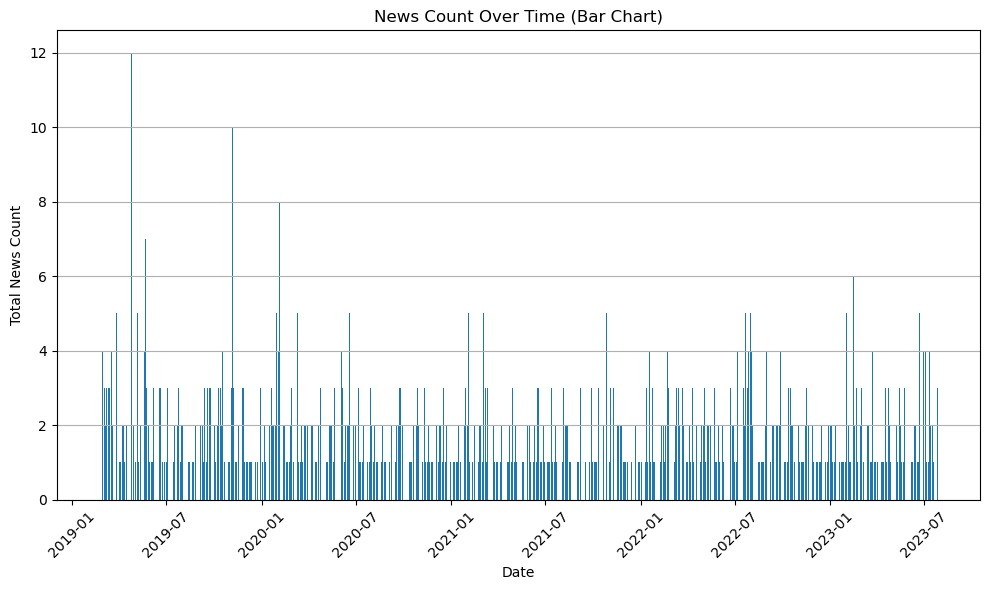

In [34]:

#data.reset_index(inplace=True)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(data['Date'], data['has_news'])
plt.xlabel('Date')
plt.ylabel('Total News Count')
plt.title('News Count Over Time (Bar Chart)')
plt.grid(axis='y')
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()


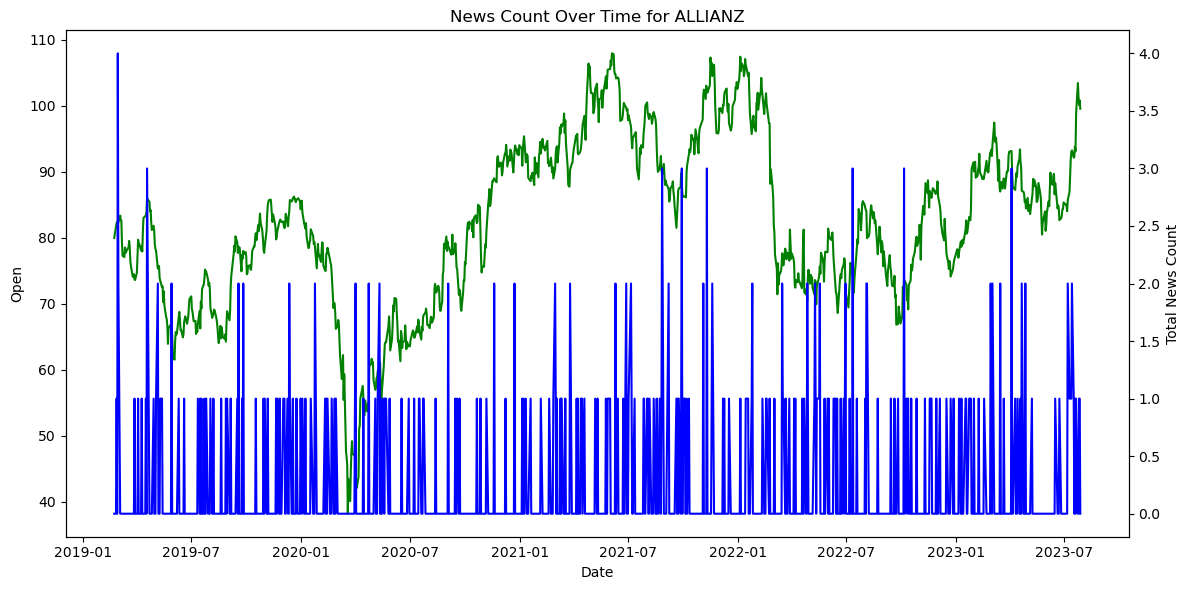

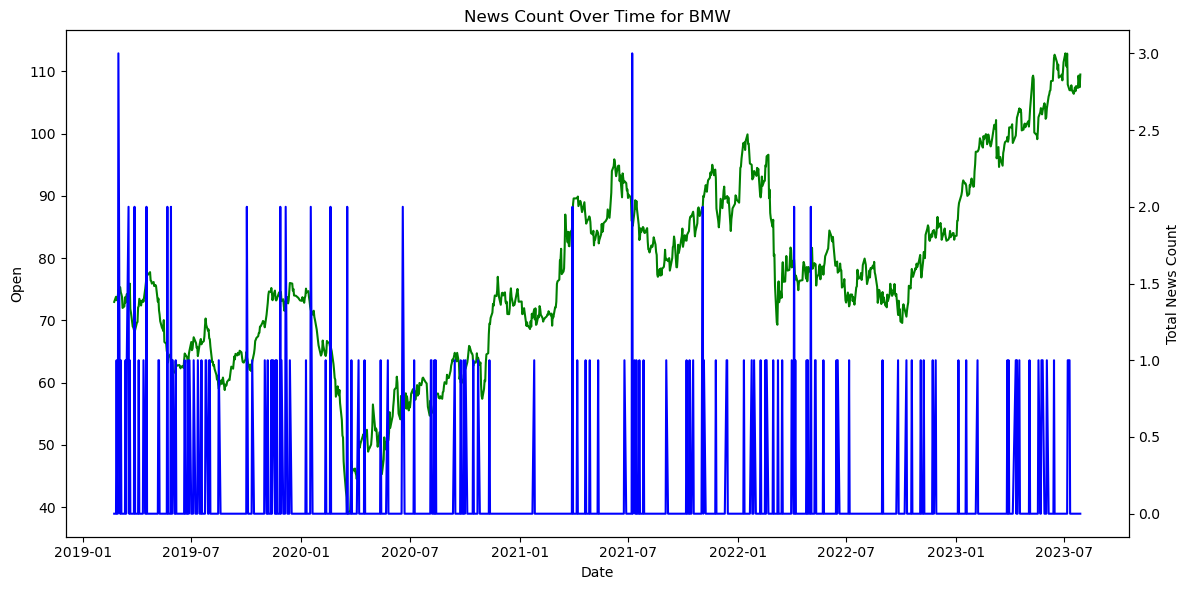

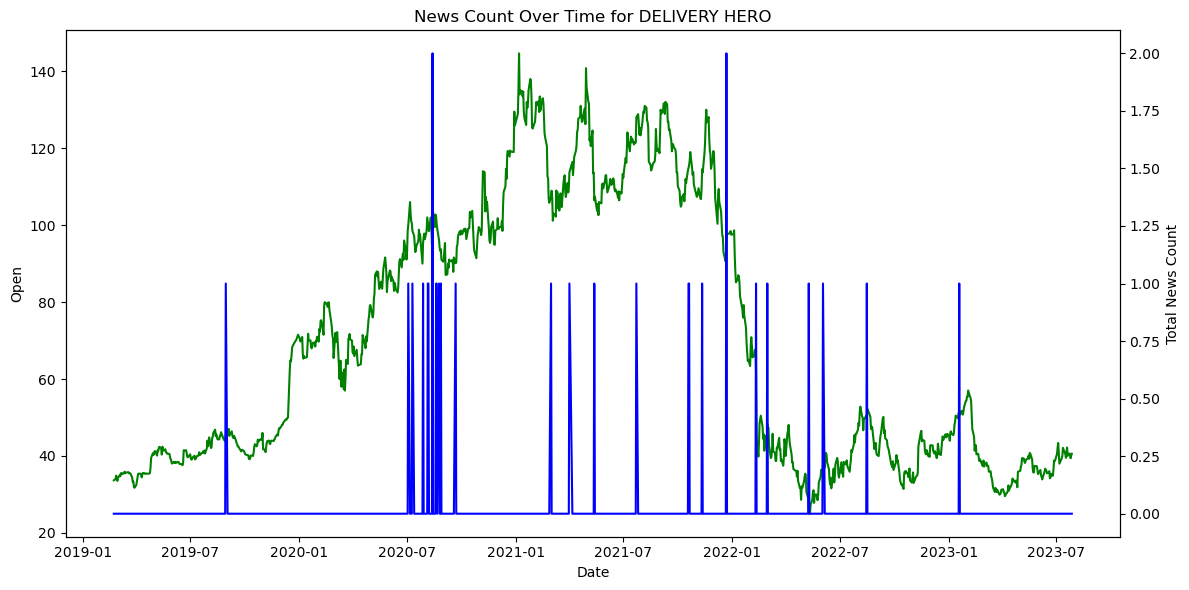

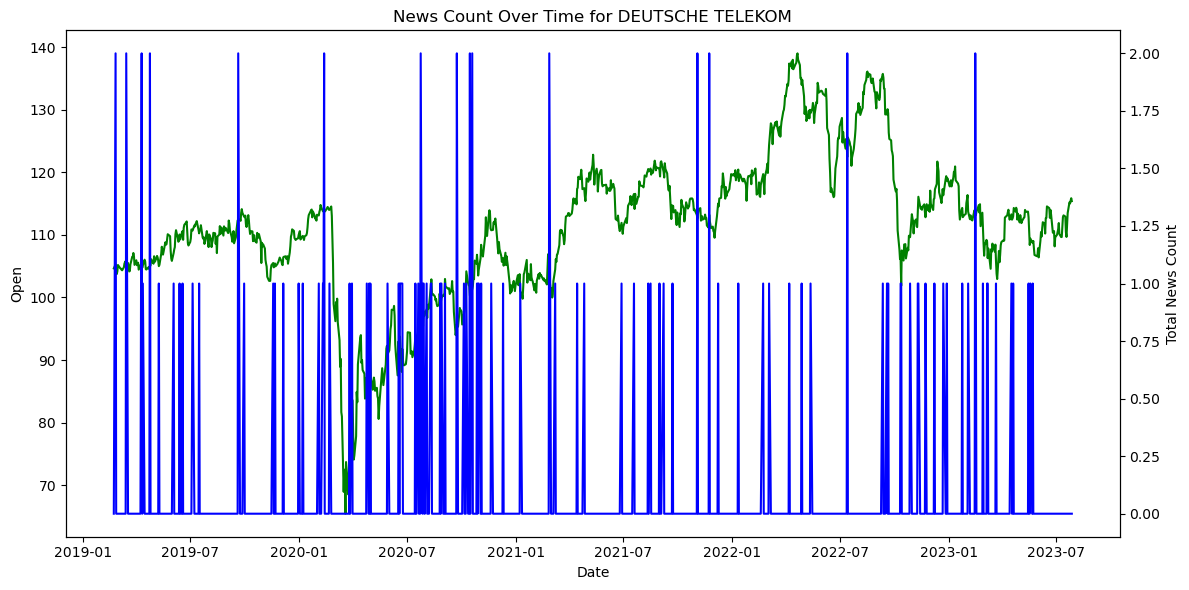

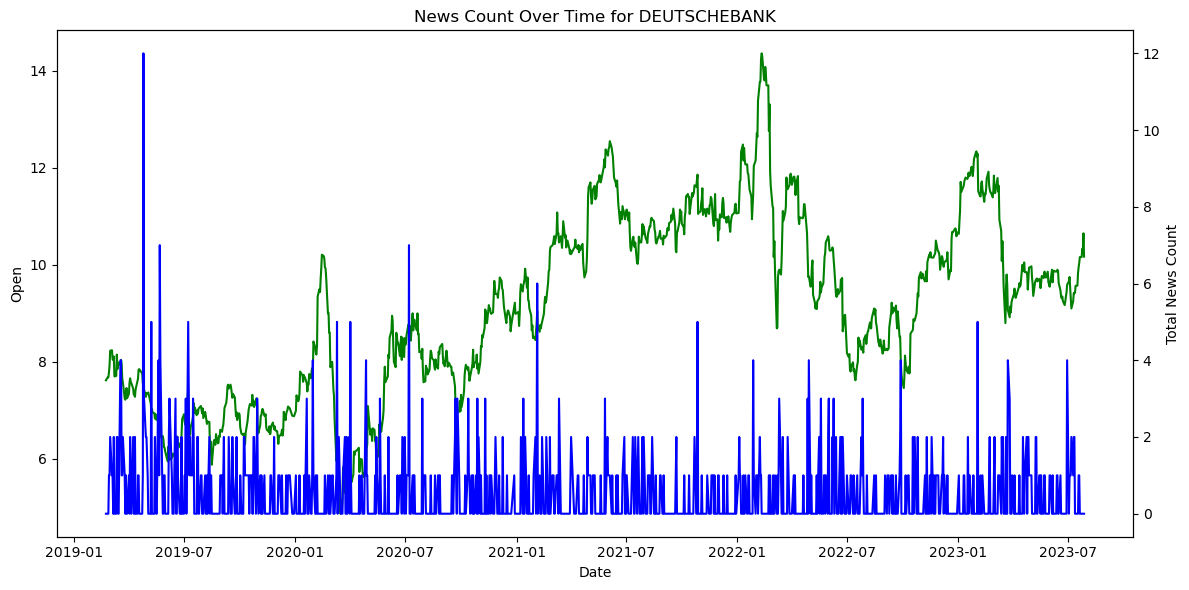

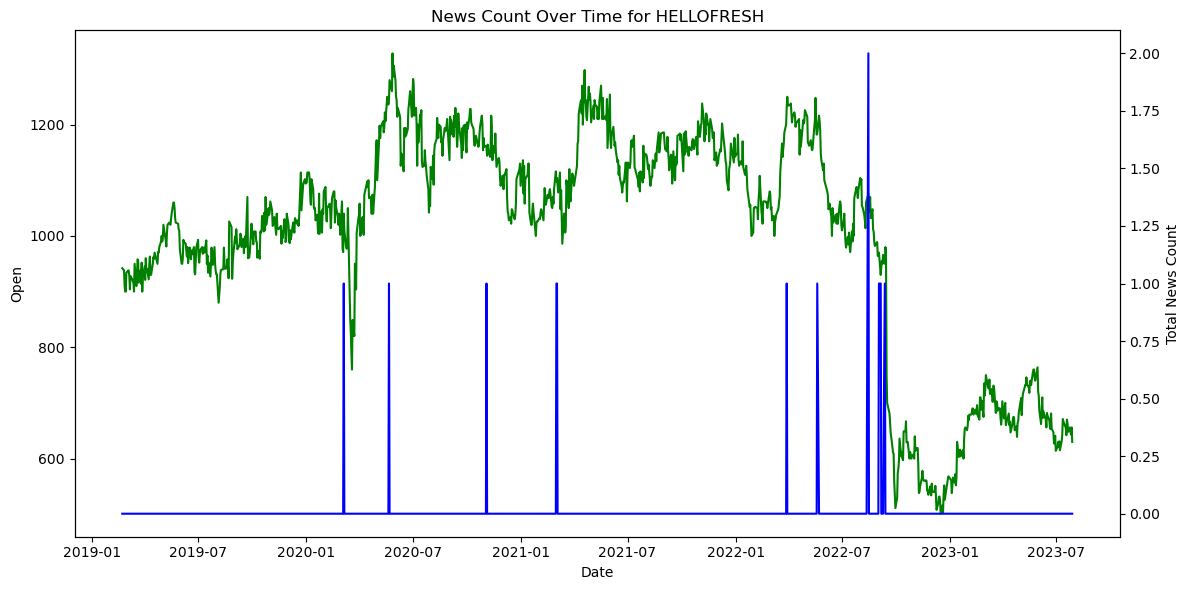

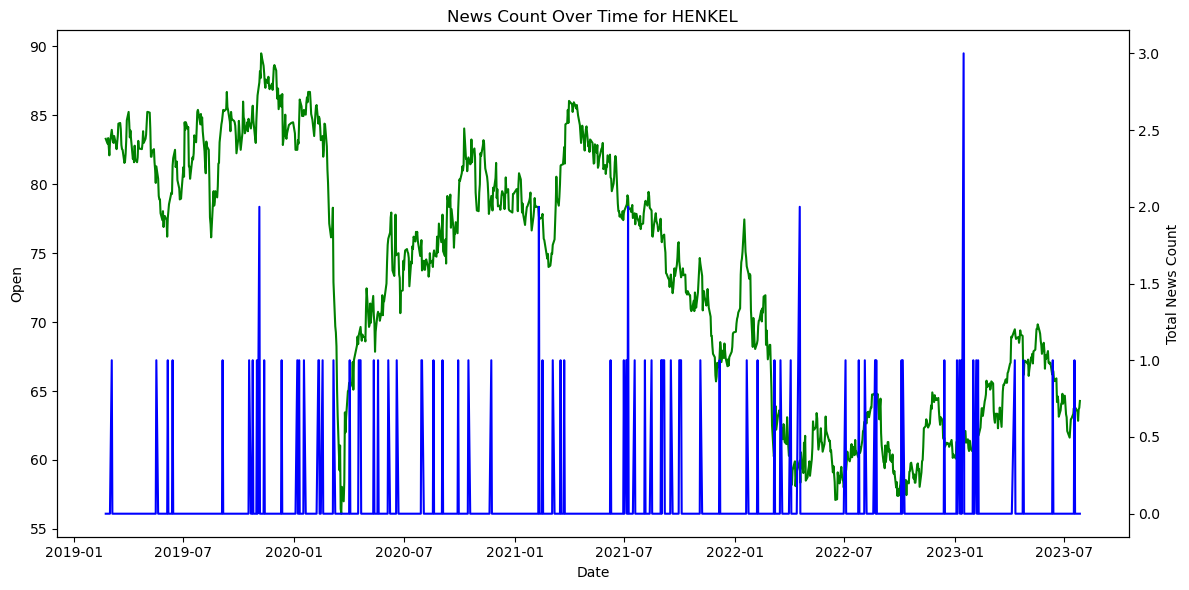

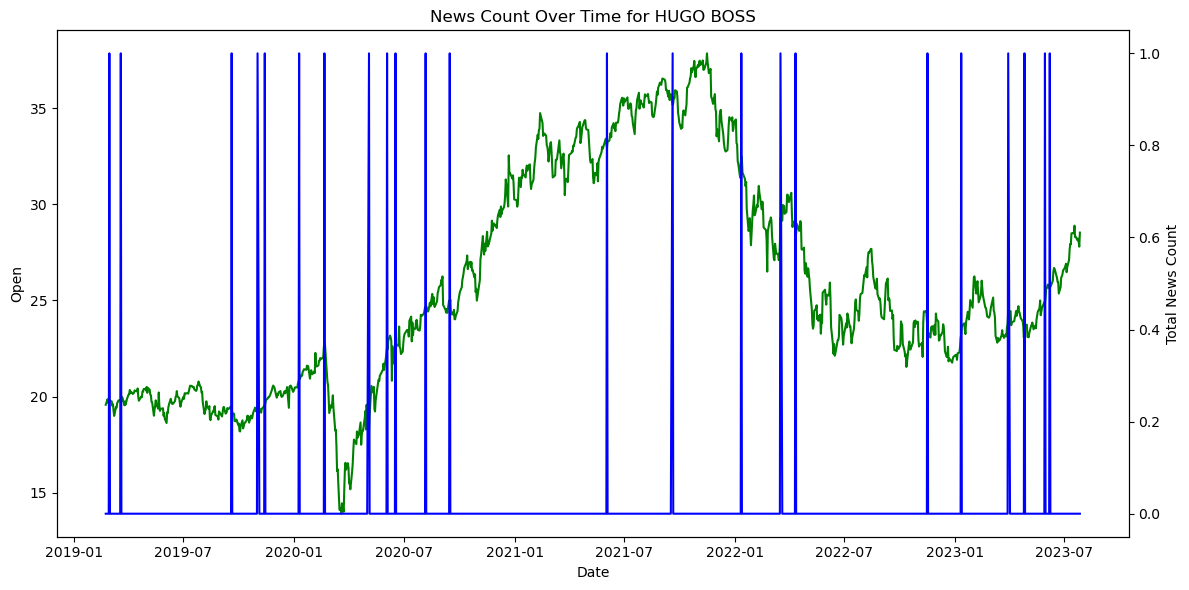

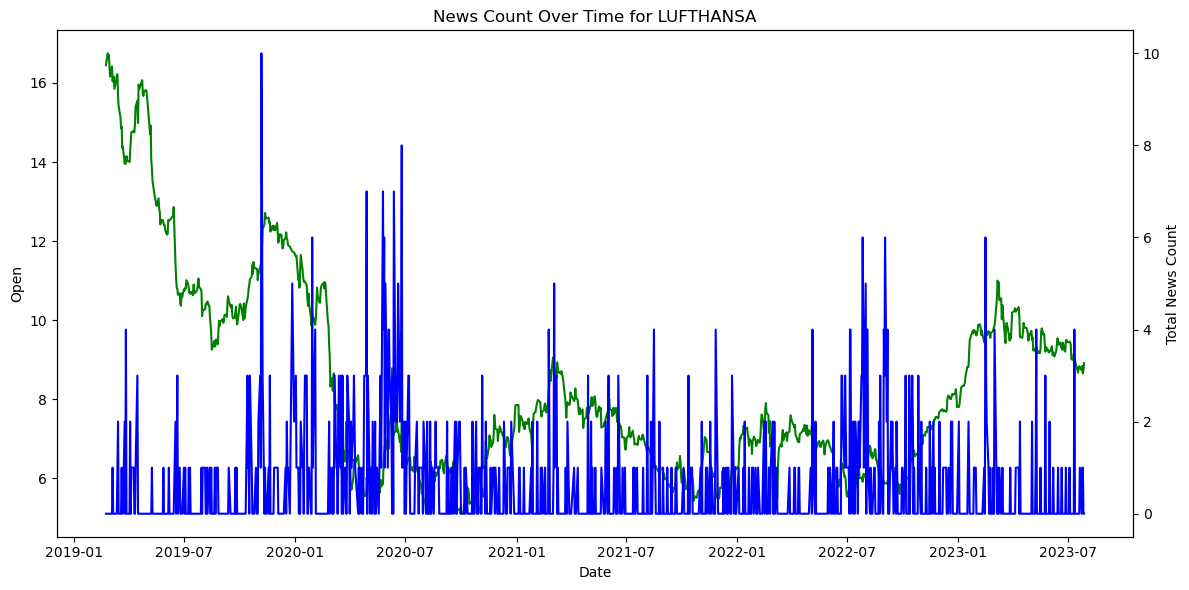

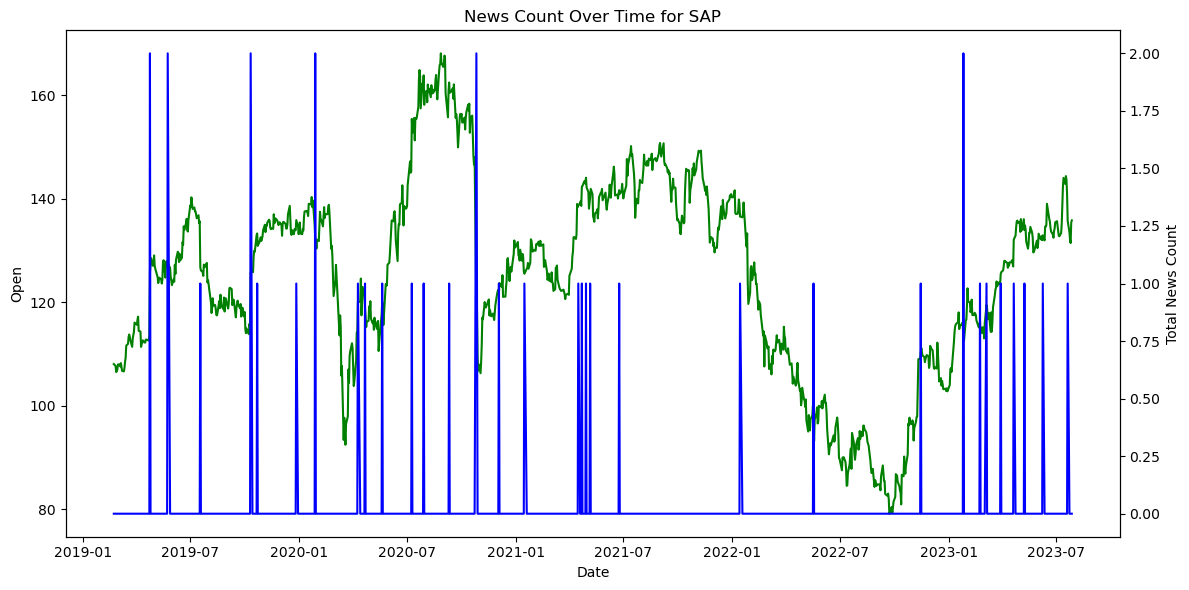

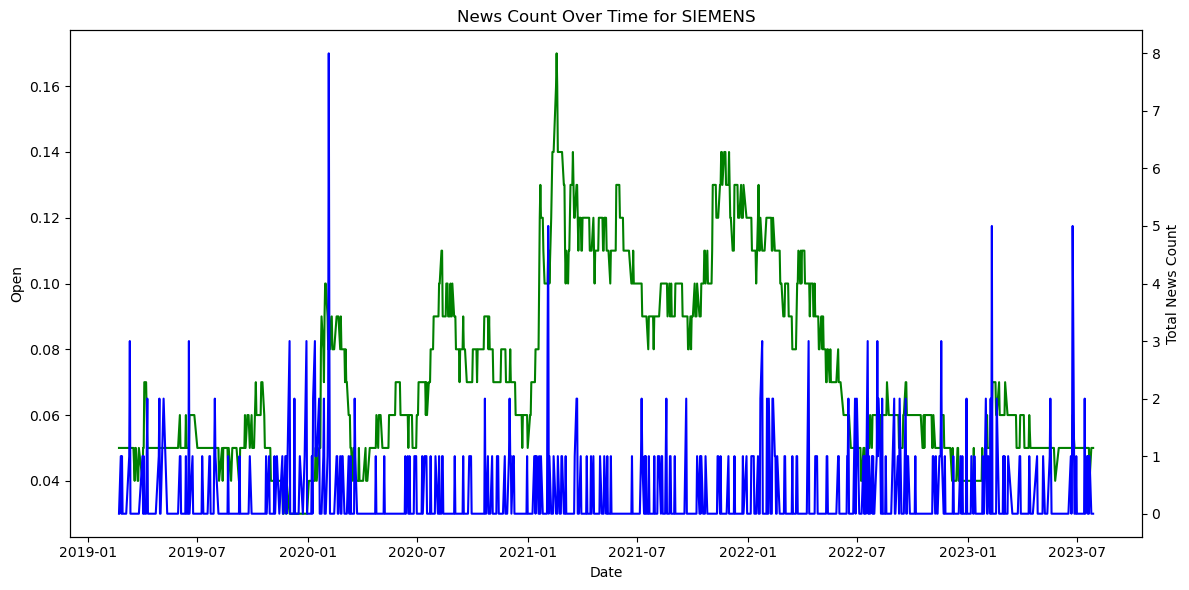

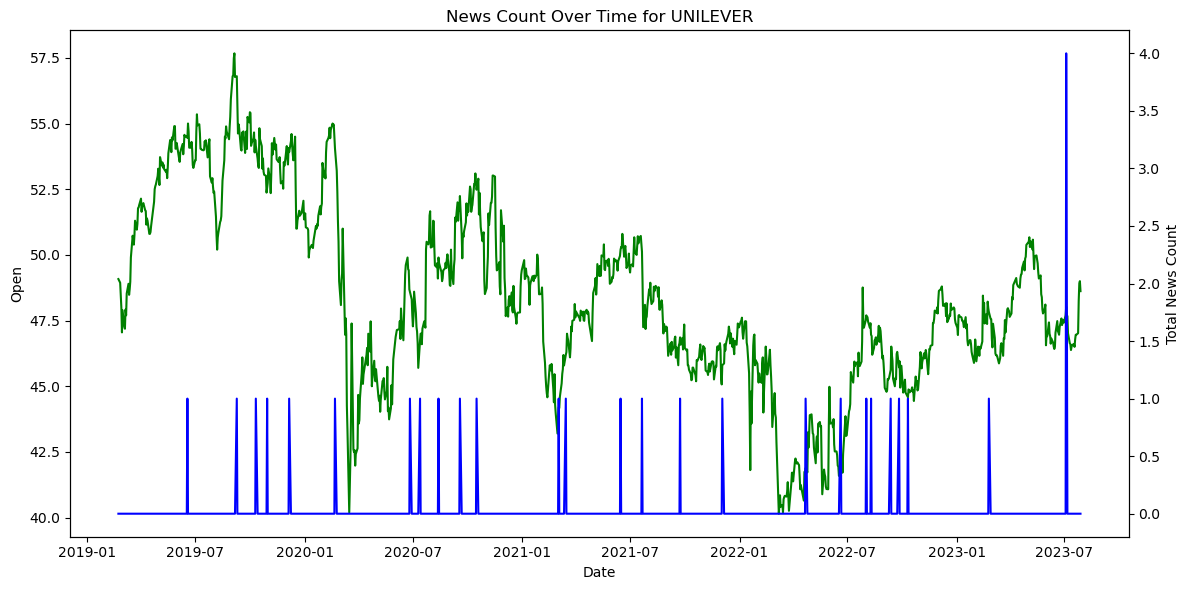

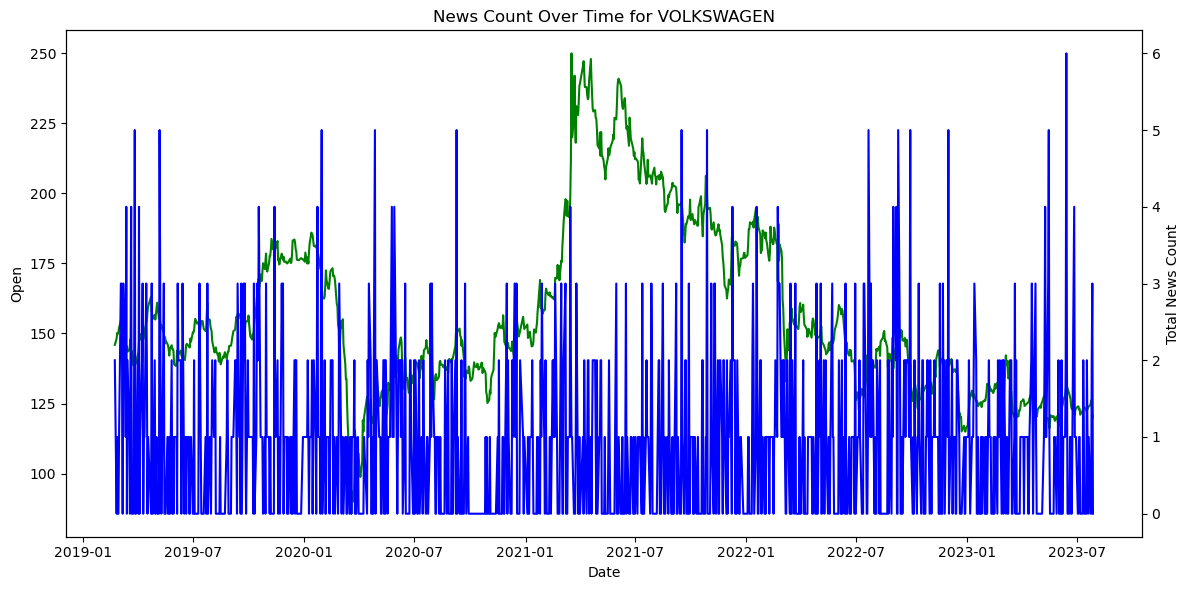

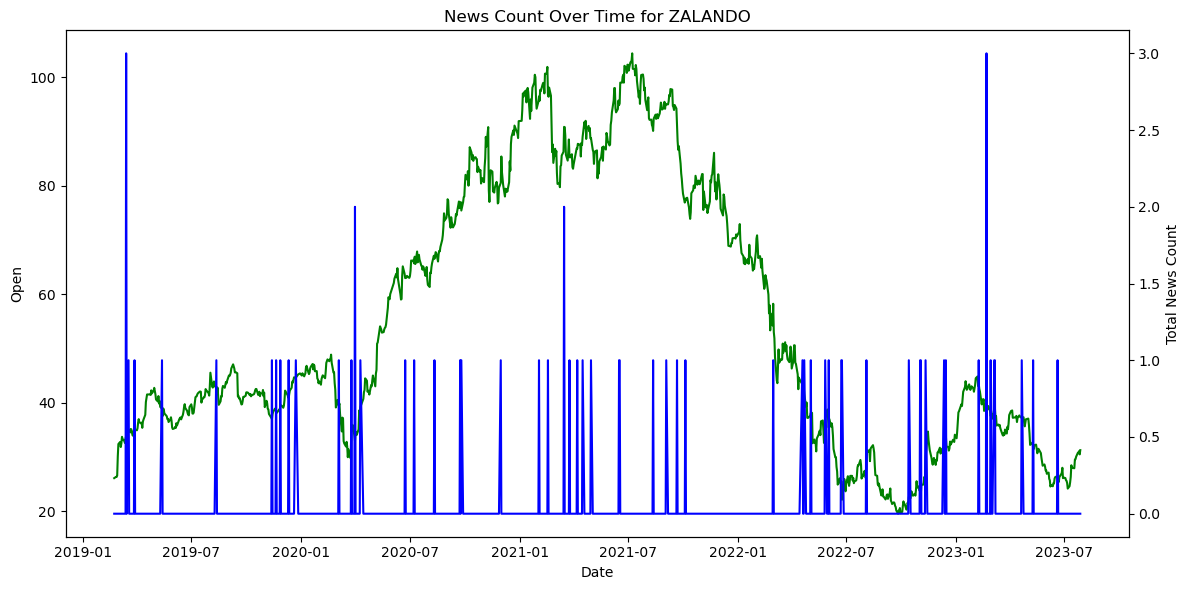

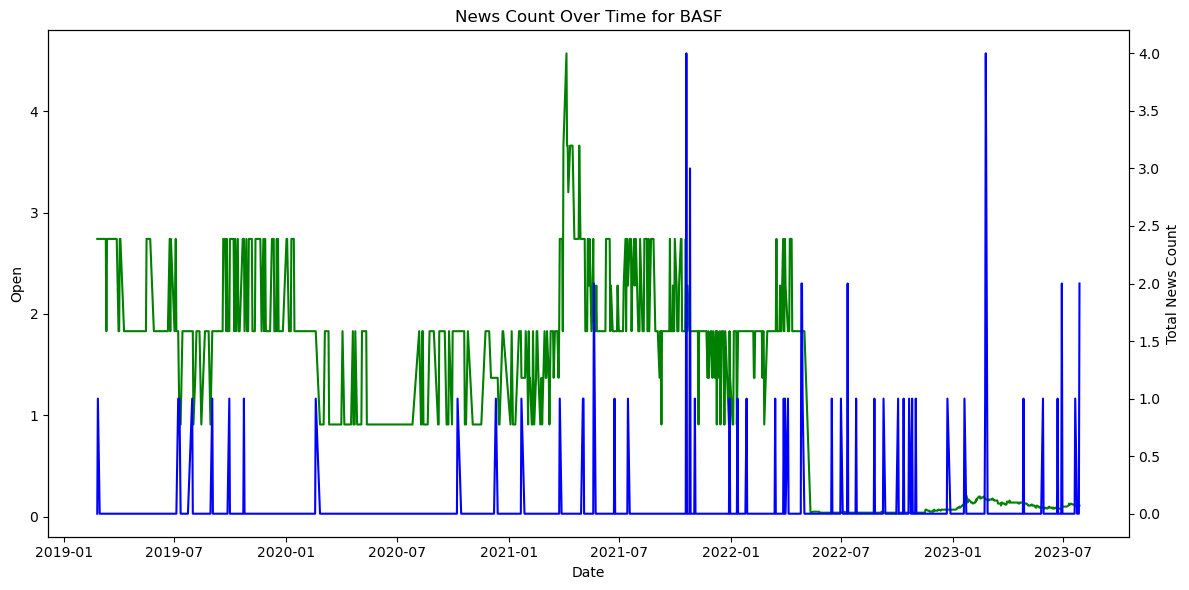

In [33]:
import matplotlib.pyplot as plt

# Assuming you already have the 'data' DataFrame with the aggregated data


# Get unique company names
companies = data['COMP'].unique()

# Create individual bar graphs for each company
for company in companies:
    company_data = data[data['COMP'] == company]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=company_data.Date, y=company_data.Open, color="g")
    ax2 = plt.twinx()
    sns.lineplot(x=company_data.Date, y=company_data.has_news, color="b", ax=ax2)
    
    plt.xlabel('Date')
    plt.ylabel('Total News Count')
    plt.title(f'News Count Over Time for {company}')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save the individual graph with a unique filename
    filename = f'{company}_news_count.png'
    plt.savefig(filename)
    
    # Show the individual graph
    plt.show()
